In [430]:
# Import libraries
import pandas as pd
import numpy as np
import textblob
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from textblob.classifiers import BaseClassifier
from textblob.blob import BaseBlob

# Import dataset
df = pd.read_csv("dataset_1_revised.csv")
df

,song title,artist/band name,year,lyrics url,song_lyrics
0,It's Only A Paper Moon,Frank Sinatra,1950,https://www.azlyrics.com/lyrics/franksinatra/i...,It is only a paper moon\nSailing over a cardbo...
1,Be Honest With Me(1991 CD Reissue),"Martin, Dean",1955,https://www.azlyrics.com/lyrics/deanmartin/beh...,Be honest with me dear whatever you do\nRememb...
2,I'm Yours,Eddy Arnold,1957,https://www.azlyrics.com/lyrics/eddyarnold/imy...,Ask the sky above and ask the earth below\nWhy...
3,Blues In My Heart,"Reeves, Jim",1957,https://www.azlyrics.com/lyrics/jimreeves/blue...,(Wish I could lose these blues in my heart)\n\...
4,I Didn't Know What Time It Was,Billie Holiday,1957,https://www.azlyrics.com/lyrics/billieholiday/...,"Once I was young \nYesterday, perhaps \nDanced..."
...,...,...,...,...,...
494,06 Burst,"Dawson, Jean",2020,https://www.azlyrics.com/lyrics/jeandawson/06b...,"Yo, this is Juan, um, so check this shit out d..."
495,Russia,Allan Rayman,2020,https://www.azlyrics.com/lyrics/allanrayman/ru...,"I'm stuck when you say, no way\nGet outta here..."
496,Rich Rich,Ufo361,2020,https://www.azlyrics.com/lyrics/ufo361/richric...,Ihr wisst Bescheid\nAh\nJa\nJa\nJa\nJa\n\nWir ...
497,Isabella,James,2021,https://www.azlyrics.com/lyrics/james/isabella...,Someday soon when I die\nThey'll do an autopsy...


In [431]:
# Find total word count and make that as a column
a=[]
for verses in df["song_lyrics"]:
    tb_doc=textblob.TextBlob(verses)
    tb_doc.words
    tb_doc=[w.lemmatize() for w in tb_doc.words]
    a.append(tb_doc)
df["lemmatized"]=a
b=[]
for x in df["lemmatized"]:
    b.append(len(x))
df["word_count"]=b

Text(0.5, 0.98, 'Year vs. Similarities')

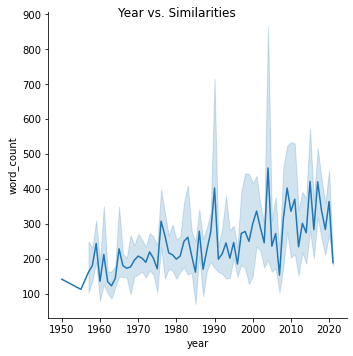

In [459]:
# Relplot of year vs. total word count
rel = sns.relplot(data=df, x='year', y='word_count',kind='line')
rel.fig.suptitle('Year vs. Similarities')

In [460]:
# Save plot as PDF
rel.savefig("project2_fig1_jbae1.pdf")

In [461]:
# Linear Regression scaling
X = df['year'].values.reshape(-1,1)
y = df['scaled'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
# Train the model and fit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
reg.fit(X_train,y_train)
# Calculates Coefficient
reg.coef_

array([[0.00394917]])

In [456]:
# Linear Regression scaling
X = df['year'].values.reshape(-1,1)
y = df['scaled'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
# Train the model and fit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
reg.fit(X_train,y_train)
# Calculates Coefficient
reg.coef_

array([[0.00394917]])

Text(0.5, 0.98, 'Year vs. Unique Words')

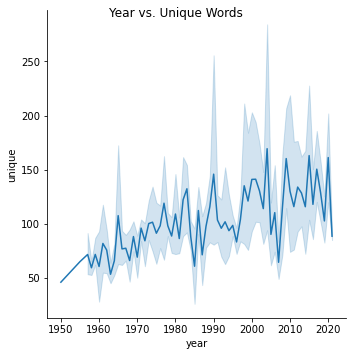

In [450]:
uq=[]
# For loop over 'lemmatized' column to allocate only unique values in each doc
for y in df['lemmatized']:
    y = np.array(y)
    y=np.unique(y)
    uq.append(y)
df['unique']=uq
num=[]
# For loop to find just number of unique words
for y in df['unique']:
    num.append(len(y))
df['unique']=num
# Relplot of year vs. total unique word count
rel = sns.relplot(data=df, x='year', y='unique',kind='line')
rel.fig.suptitle('Year vs. Unique Words')

In [451]:
# Save plot as PDF
rel.savefig("project2_fig2_jbae1.pdf")

In [453]:
# Linear Regression scaling
X=df['year'].values.reshape(-1,1)
y=df['unique'].values.reshape(-1,1)
# Train the model and fit
reg = LinearRegression()
reg.fit(X, y)
# Calculates Coefficient
reg.coef_

array([[1.0247247]])

In [440]:
# Reshape the values for columns 'year' and 'unique'
X = df['year'].values.reshape(-1,1)
y = df['unique'].values.reshape(-1,1)
# Linear Regression scaling
reg = LinearRegression()
reg.fit(X, y)
# Train the model and fit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
reg.fit(X_train,y_train)
# Calculates Coefficient
reg.coef_

array([[0.95503141]])

Text(0.5, 0.98, 'Year vs. Ratio of Unique words to Total words')

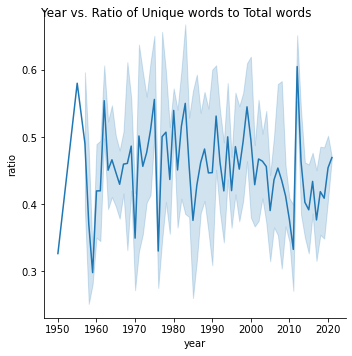

In [441]:
# Calculate Ratio of unique word count to total word count 
# and assign to a column 'ratio'
y=df['unique']/df['word_count']
df['ratio']=y
# Relplot of year vs. ratio
rel=sns.relplot(data=df,x='year',y='ratio',kind='line')
rel.fig.suptitle('Year vs. Ratio of Unique words to Total words')

In [442]:
# Save plot as PDF
rel.savefig("project2_fig3_jbae1.pdf")

In [443]:
# Reshape the values for columns 'year' and 'unique'
X = df['year'].values.reshape(-1,1)
y = df['ratio'].values.reshape(-1,1)
# Linear Regression scaling
reg = LinearRegression()
reg.fit(X, y)
# Train the model and fit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
reg.fit(X_train,y_train)
# Calculates Coefficient
reg.coef_

array([[-0.00061197]])